## <b>Weather forecast project 

# <b>04 - IMBALANCED DATA EXPLORATION

# Rain in Australia
---
#### Dataset source:

Le dataset issu de l'étape de feature engineering est utilisé dans ce notebook : 
    
    - data_features.csv contenant les données nettoyées et préparées sur la base du dataset initiale

#### Context:
Brève description du notebook 04 :

> <div class= "alert alert-block alert-info"> Cette partie de l'analyse se concentre sur les techniques utilisées pour <b>traiter les jeux de données déséquilibrés</b>, comme cela a été identifié dans la partie précédente consacrée à l'exploration des données. Afin de résoudre ce problème, nous avons appliqué des techniques de sur-échantillonnage et de sous-échantillonnage aléatoires sur un modèle SVM simple ainsi que sur un classificateur balancé.

    Le but de ces techniques est d'équilibrer la distribution de classe dans le jeu de données afin de garantir des prévisions précises pour toutes les classes et éviter que le modèle ne se concentre sur la classe majoritaire. Les performances de chaque modèle ont été évaluées en utilisant plusieurs mesures de classification telles que la précision, le rappel et le F1-score.
    
</div>

# [Table of contents](#0)<a name="0"></a> 

1. [Préparation des données](#1)

    1.1 [Séparation des données en variables explicatives et variable cible](#1.1)
    
    1.2 [Fractionnement des données en ensemble d'entraînement et de test](#1.2)
    
    1.3 [Oversampling](#1.3)
    
    1.4 [Undersampling](#1.4)
    
2. [Application d'un modèle SVM](#2)

    2.1 [Classification SVM avec un sur-échantillon aléatoire ](#2.1)
    
    2.2 [Classification SVM avec un sous-échantillon aléatoire](#2.2)
    
    2.3 [Optimisation de la classification SVM avec seuil de prédiction pour améliorer la performance du modèle](#2.3)
    
3. [Application d'un modèle Balanced Random Forest Classifier](#3)

4. [Conclusion](#4)

#### Packages nécessaires au notebook :

In [228]:
import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [165]:
df = pd.read_csv("../data/data_features.csv").iloc[:,2:] #iloc en attendant de corriger le notebook de preprocessing

# 1.Préparation des données<a name=1></a>
[return to the plan](#0)  

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed auctor, elit sit amet convallis commodo, sapien ex tincidunt odio, nec auctor arcu odio in enim. Nulla et lacus nibh. 

Suspendisse vitae dui luctus, molestie felis vel, hendrerit diam. Nullam eget dui vitae eros consectetur laoreet. Aliquam sagittis orci vel augue ullamcorper, non tempor urna malesuada :
* Pellentesque hendrerit libero at odio sagittis, id blandit nulla eleifend
* Sed vel sapien a velit vestibulum blandit. Sed lobortis lobortis neque

## 1.1 Séparation des données en variables explicatives et variable cible <a name="1.1"></a>
[return to the plan](#0)  

In [166]:
X = df.drop(['raintomorrow'],axis=1)
y = df['raintomorrow']

In [167]:
y.value_counts(normalize=True)

0    0.840098
1    0.159902
Name: raintomorrow, dtype: float64

> Dans ce dataset, 16% des données correspondent à une prédiction de pluie le lendemain, ce qui signifie qu'un modèle naïf qui prédit qu'il ne pleut pas systématiquement, obtiendrait déjà un score de 84 % d'accuracy.

## 1.2 Fractionnement des données en ensemble d'entraînement et de test <a name="1.2"></a>
[return to the plan](#0)  

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

## 1.3 Oversampling <a name="1.3"></a>
#### Sur-échantillonnage aléatoire des données d'entraînement X_train et y_train 
[return to the plan](#0)  

La méthode RandomOverSampler() génère de nouvelles instances aléatoires de la classe minoritaire "raintomorrow" pour créer un ensemble de données équilibré en termes de distribution de classe.

In [50]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

Classes échantillon oversampled : {1: 48841, 0: 48841}


In [234]:
# Nombre d'échantillons par classe avant le suréchantillonnage
counts_before = dict(pd.Series(y_train).value_counts())

# Nombre d'échantillons par classe après le suréchantillonnage
counts_after = dict(pd.Series(y_ro).value_counts())

# Graphe
df_rOs = pd.DataFrame({'Nombre d\'échantillons': list(counts_before.values()) + list(counts_after.values()), 'Type': ['Avant'] * len(counts_before) + ['Après'] * len(counts_after), 'Classe': ['Raintomorrow = 0', 'Raintomorrow = 1'] * 2})
df_rOs.hvplot.bar(x='Type', y='Nombre d\'échantillons', by='Classe', stacked=True, title='Suréchantillonnage aléatoire avec RandomOverSampler', xlabel='Postraitements', ylabel='Nombre d\'échantillons', legend='top')

:Bars   [Type,Classe]   (Nombre d'échantillons)

## 1.4 Undersampling <a name="1.4"></a>
#### Sous-échantillonnage aléatoire des données d'entraînement X_train et y_train 
[return to the plan](#0)  

In [55]:
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)
print('Classes échantillon undersampled :', dict(pd.Series(y_ru).value_counts()))

Classes échantillon undersampled : {0: 9324, 1: 9324}


In [235]:
# Nombre d'échantillons par classe avant le suréchantillonnage
counts_before = dict(pd.Series(y_train).value_counts())

# Nombre d'échantillons par classe après le suréchantillonnage
counts_after = dict(pd.Series(y_ru).value_counts())

# Graphe
df_rUs = pd.DataFrame({'Nombre d\'échantillons': list(counts_before.values()) + list(counts_after.values()), 'Type': ['Avant'] * len(counts_before) + ['Après'] * len(counts_after), 'Classe': ['Raintomorrow = 0', 'Raintomorrow = 1'] * 2})
df_rUs.hvplot.bar(x='Type', y='Nombre d\'échantillons', by='Classe', stacked=True, title='Sous-échantillonnage aléatoire avec Undersampled', xlabel='Postraitements', ylabel='Nombre d\'échantillons', legend='top')

:Bars   [Type,Classe]   (Nombre d'échantillons)

# 2.Application d'un modèle SVM<a name="2"></a>
[return to the plan](#0)  

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed auctor, elit sit amet convallis commodo, sapien ex tincidunt odio, nec auctor arcu odio in enim. Nulla et lacus nibh. 

Suspendisse vitae dui luctus, molestie felis vel, hendrerit diam. Nullam eget dui vitae eros consectetur laoreet. Aliquam sagittis orci vel augue ullamcorper, non tempor urna malesuada :
* Pellentesque hendrerit libero at odio sagittis, id blandit nulla eleifend
* Sed vel sapien a velit vestibulum blandit. Sed lobortis lobortis neque

In [83]:
# Instanciation d'un objet SVM avec une fonction de noyau RBF et gamma='scale'
svm = SVC(gamma='scale')

## 2.1. Classification SVM avec un sur-échantillon aléatoire <a name="2.1"></a>
[return to the plan](#0) 

In [85]:
# Entrainement d'un modèle SVM sur les données d'entraînement X_ro et y_ro.
svm.fit(X_ro, y_ro)

SVC()

In [86]:
# Prédiction des étiquettes de classe pour les données de test X_test
y_pred = svm.predict(X_test)

In [87]:
# Création d'une table de contingence (matrice de confusion) montrant le nombre de prédictions correctes et incorrectes pour chaque classe
contingency_table = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Prédiction'])

display(contingency_table)
print("\n")

print("Rapport de classification: métriques de performance pour chaque classe")
print("\n")
report = classification_report_imbalanced(y_test, y_pred)
print(report)

Prédiction,0,1
Classe réelle,,
0,9450,2790
1,638,1664




Rapport de classification: métriques de performance pour chaque classe


                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.77      0.72      0.85      0.75      0.56     12240
          1       0.37      0.72      0.77      0.49      0.75      0.56      2302

avg / total       0.85      0.76      0.73      0.79      0.75      0.56     14542



#### <b> Analyse :
> * En analysant le rapport de classification, nous pouvons conclure que le modèle SVM entraîné sur les données d'entraînement déséquilibrées a une performance moyenne sur les données de test déséquilibrées.
> * La métrique de rappel (recall) est relativement élevée pour la classe minoritaire (classe 1), ce qui indique que le modèle est relativement bon à identifier les vrais positifs. 
> * Cependant, la précision (precision) est relativement faible pour la même classe, ce qui signifie que le modèle peut également produire un grand nombre de faux positifs. 
> * La métrique F1-score est une mesure harmonique entre la précision et le rappel et est donc une mesure plus équilibrée de la performance globale du modèle. 
> * <b> Le score F1 est d'environ 0,5 pour la classe 1 minoritaire, cela indique que le modèle peut être amélioré pour mieux l'identifier

## 2.2.Classification SVM avec un sous-échantillon aléatoire<a name="2.2"></a>
[return to the plan](#0) 

In [88]:
# Entrainement d'un modèle SVM sur les données d'entraînement X_ru, y_ru.
svm.fit(X_ru, y_ru)

SVC()

In [89]:
# Prédiction des étiquettes de classe pour les données de test X_test
y_pred = svm.predict(X_test)

In [218]:
# Création d'une table de contingence (matrice de confusion) montrant le nombre de prédictions correctes et incorrectes pour chaque classe
contingency_table = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Prédiction'])

display(contingency_table)
print("\n")

print("Rapport de classification: métriques de performance pour chaque classe")
print("\n")
report = classification_report_imbalanced(y_test, y_pred)
print(report)

Prédiction,0,1
Classe réelle,,
0,9090,3150
1,643,1659




Rapport de classification: métriques de performance pour chaque classe


                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.74      0.72      0.83      0.73      0.54     12240
          1       0.34      0.72      0.74      0.47      0.73      0.53      2302

avg / total       0.84      0.74      0.72      0.77      0.73      0.54     14542



#### <b> Analyse :
> * Le modèle SVM a des performances relativement bonnes pour prédire la classe "0" (pas de pluie demain), mais des performances plus faibles pour prédire la classe "1" (pluie demain).
> * Le modèle a correctement prédit la classe "0" pour la grande majorité des échantillons (9130 sur 12240, soit une précision de 0.94), mais il a eu plus de difficulté à prédire la classe "1" (seulement 1669 prédictions correctes sur 2302, soit une précision de 0.35).
> * <b> Le score F1 est d'environ 0,77 pour la classe 1 minoritaire, cela indique que le modèle est plus performant avec un sous-échantillonage des données
    
<b> Le risque principal du sous-échantillonnage est de perdre de l'information qui peut être importante pour la prédiction, ce qui nous a conduit à explorer d'autres méthodes d'optimisation, notamment la modification du seuil de classification pour prédire les classes finales à partir des probabilités prédites.

## 2.3. Optimisation de la classification SVM avec seuil de prédiction pour améliorer la performance du modèle<a name="2.3"></a>
[return to the plan](#0) 

In [169]:
# Instanciation d'un objet SVM avec une fonction de noyau RBF et gamma='scale' et probability= True' pour retourner les probabilité
svm = SVC(probability=True, gamma='scale')

In [170]:
# Entrainement d'un modèle SVM sur les données d'entraînement X_train, y_train
svm.fit(X_train, y_train)        

SVC(probability=True)

#### 2.3.1 Application d'un seuil de classification à 0.4
##### Si raintomorow est prédite avec une probabilité supérieure ou égale à 40 %, la classe finale sera prédite comme 1, sinon elle sera prédite comme 0.

In [171]:
threshold = 0.4 

In [172]:
probs = svm.predict_proba(X_test)

In [173]:
pred_class = (probs[:,1]>=threshold).astype('int')

In [221]:
# Création d'une table de contingence (matrice de confusion) montrant le nombre de prédictions correctes et incorrectes pour chaque classe
contingency_table = pd.crosstab(y_test, pred_class, rownames=['Classe réelle'], colnames=['Prédiction'])

display(contingency_table)
print("\n")

print("Rapport de classification: métriques de performance pour chaque classe")
print("\n")
report = classification_report_imbalanced(y_test, pred_class)
print(report)


Prédiction,0,1
Classe réelle,,
0,12204,36
1,2052,250




Rapport de classification: métriques de performance pour chaque classe


                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      1.00      0.11      0.92      0.33      0.12     12240
          1       0.87      0.11      1.00      0.19      0.33      0.10      2302

avg / total       0.86      0.86      0.25      0.81      0.33      0.11     14542



#### <b> Analyse :
> * Le rapport de classification montre que le modèle a une précision élevée pour la classe 0 (pas de pluie demain), mais une précision beaucoup plus faible pour la classe 1 (pluie demain). 
> * Le rappel est similaire pour les deux classes, mais la spécificité est légèrement plus élevée pour la classe 1. 
> * Le score F1 est plus élevé pour la classe 0 que pour la classe 1. 
> * La moyenne géométrique et l'exactitude équilibrée sont similaires pour les deux classes et indiquent une performance globale moyenne du modèle. <b> Cela suggère que le modèle a plus de difficulté à prédire les jours avec pluie que les jours sans pluie.


Le nouveau résultat montre une amélioration légère pour la classe 1 (pluie demain) en termes de rappel et de spécificité, mais la précision est toujours faible. 
Le seuil de classification pourrait être ajusté pour tenter d'améliorer la précision de la classe 1 au détriment de la précision de la classe 0. 

#### 2.3.2 Impact de l'ajustement du seuil de classification sur la performance du modèle

In [184]:
# Liste des seuils de classification 
thresholds = np.arange(0.1, 1.0, 0.1) 

# Initialisation des listes pour stocker les scores
f1_scores_0 = []
f1_scores_1 = []
precisions_0 = []
precisions_1 = []
recalls_0 = []
recalls_1 = []

# Initialisation du DataFrame
columns = ['Seuil', 'Précision (classe 0)', 'Rappel (classe 0)', 'F1-score (classe 0)', 'Précision (classe 1)', 'Rappel (classe 1)', 'F1-score (classe 1)']
df_report_thresholds = pd.DataFrame(columns=columns)

for threshold in thresholds:
    # Prédiction des classes avec le seuil donné
    probs = svm.predict_proba(X_test)
    pred_class = (probs[:,1]>=threshold).astype('int')
    
    # Rapport de classification pour les deux classes
    report_dict = classification_report_imbalanced(y_test, pred_class, output_dict=True)
    row = {
        'Seuil': threshold,
        'Précision (classe 0)': report_dict[0]['pre'],
        'Rappel (classe 0)': report_dict[0]['rec'],
        'F1-score (classe 0)': report_dict[0]['f1'],
        'Précision (classe 1)': report_dict[1]['pre'],
        'Rappel (classe 1)': report_dict[1]['rec'],
        'F1-score (classe 1)': report_dict[1]['f1']
    }
    df_report_thresholds = pd.concat([df_report_thresholds, pd.DataFrame(row, index=[0])], ignore_index=True)

# Affichage du DataFrame sous forme de tableau
print(df_report_thresholds.to_string(index=False))

 Seuil  Précision (classe 0)  Rappel (classe 0)  F1-score (classe 0)  Précision (classe 1)  Rappel (classe 1)  F1-score (classe 1)
   0.1              0.953542           0.680801             0.794413              0.326728           0.823632             0.467859
   0.2              0.931762           0.829984             0.877933              0.428140           0.676803             0.524491
   0.3              0.916778           0.897304             0.906936              0.509368           0.566898             0.536595
   0.4              0.905867           0.934804             0.920108              0.582418           0.483493             0.528365
   0.5              0.896757           0.958007             0.926371              0.649386           0.413553             0.505308
   0.6              0.888226           0.972549             0.928477              0.705263           0.349262             0.467170
   0.7              0.877014           0.982843             0.926918              0

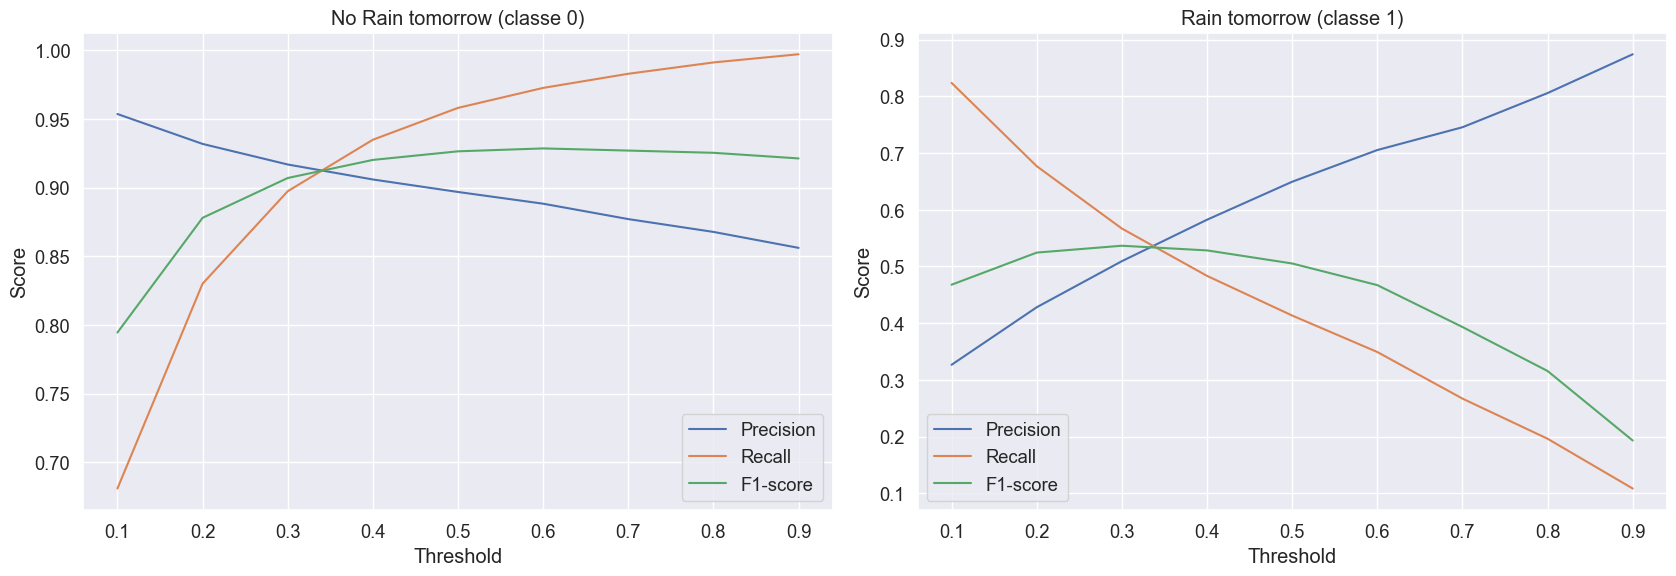

In [237]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

sns.lineplot(x='Seuil', y='Précision (classe 0)', data=df_report_thresholds, label='Precision', ax=ax1)
sns.lineplot(x='Seuil', y='Rappel (classe 0)', data=df_report_thresholds, label='Recall', ax=ax1)
sns.lineplot(x='Seuil', y='F1-score (classe 0)', data=df_report_thresholds, label='F1-score', ax=ax1)
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Score')
ax1.set_title("No Rain tomorrow (classe 0)")
ax1.legend()

sns.lineplot(x='Seuil', y='Précision (classe 1)', data=df_report_thresholds, label='Precision', ax=ax2)
sns.lineplot(x='Seuil', y='Rappel (classe 1)', data=df_report_thresholds, label='Recall', ax=ax2)
sns.lineplot(x='Seuil', y='F1-score (classe 1)', data=df_report_thresholds, label='F1-score', ax=ax2)
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Score')
ax2.set_title("Rain tomorrow (classe 1)")
ax2.legend()

fig.tight_layout()
plt.show()

#### <b> Analyse :

<b> En ce qui concerne les performances maximales atteintes pour la classe 1, la précision maximale est de 0,81, le rappel maximal est de 0,50 et le F1-score maximal est de 0,62. Ces valeurs montrent que le modèle a des difficultés à prédire la pluie le lendemain (raintomorrow).
> En analysant les résultats pour la classe 1, on peut noter que la précision, le rappel et le F1-score augmentent tous avec la valeur du seuil jusqu'à un certain point, après quoi ils commencent à diminuer. Cela suggère qu'il existe un seuil optimal pour la classe 1 au-delà duquel le modèle commence à perdre en performances.
> 
> Le rappel pour la classe 1 est assez faible, ce qui signifie que le modèle manque de nombreuses prédictions positives (raintomorrow = 1).  


<b> Ce qui nous conduit à rechercher et à tester un autre modèle tel que BalancedRandomForestClassifier

# 3. Application d'un modèle Balanced Random Forest Classifier<a name="3"></a>
[return to the plan](#0)  

In [227]:
# Création d'une instance de la classe BalancedRandomForestClassifier
bclf = BalancedRandomForestClassifier()

# Entraînement du modèle sur les données d'entraînement
bclf.fit(X_train, y_train)

# Prédiction des étiquettes de classe pour les données de test en utilisant le modèle entraîné
y_pred = bclf.predict(X_test)

In [233]:
# Création d'une table de contingence (matrice de confusion) montrant le nombre de prédictions correctes et incorrectes pour chaque classe
contingency_table = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Prédiction'])

display(contingency_table)
print("\n")

print("Rapport de classification: métriques de performance pour chaque classe")
print("\n")
report = classification_report_imbalanced(y_test, y_pred)
print(report)

Prédiction,0,1
Classe réelle,,
0,9735,2505
1,457,1845




Rapport de classification: métriques de performance pour chaque classe


                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.80      0.80      0.87      0.80      0.64     12240
          1       0.42      0.80      0.80      0.55      0.80      0.64      2302

avg / total       0.87      0.80      0.80      0.82      0.80      0.64     14542



#### <b> Analyse :
> En ce qui concerne les performances maximales atteintes pour la classe 1, la précision maximale est de 0,81, le rappel maximal est de 0,50 et le F1-score maximal est de 0,62. Ces valeurs montrent que le modèle a des difficultés à prédire la pluie le lendemain (raintomorrow).
> D'après la matrice de confusion, le modèle a prédit correctement 9735 observations de la classe 0 (pas de pluie demain) et 1845 observations de la classe 1 (pluie demain), tandis que 2505 observations de la classe 1 ont été mal classées en classe 0 et 457 observations de la classe 0 ont été mal classées en classe 1.
>
>Le rapport de classification déséquilibré montre que le modèle a une précision élevée pour la classe 0 (96%) et une précision faible pour la classe 1 (42%). Cela signifie que le modèle est très précis pour prédire les observations de la classe 0, mais qu'il a tendance à faire plus d'erreurs pour prédire les observations de la classe 1. Le rappel est élevé pour la classe 1 (80%), ce qui indique que le modèle a identifié la plupart des observations de la classe 1, mais le rappel est faible pour la classe 0 (80%), ce qui indique que le modèle a manqué certaines observations de la classe 0. Le score F1 est de 0,55 pour la classe 1, ce qui signifie que le modèle a un compromis entre la précision et le rappel pour cette classe.
>

<b> En fin de compte, le modèle BalancedRandomForestClassifier semble mieux performant que le modèle SVM dans la prédiction de la classe déséquilibrée. Cependant, le modèle a encore besoin d'être amélioré pour être plus performant pour la classe 1.

# 4.Conclusion <a name="4"></a>
[return to the plan](#0)  

> <b> En analysant les différentes approches, nous pouvons conclure que :
> * En utilisant un jeu de données déséquilibré avec un modèle SVM, nous avons obtenu des performances moyennes sur les données de test déséquilibrées. Bien que le rappel pour la classe minoritaire était relativement élevé, la précision était relativement faible, indiquant que le modèle pouvait produire un grand nombre de faux positifs. Cela montre l'importance d'utiliser des techniques de sur-échantillonnage et de sous-échantillonnage pour équilibrer les classes du jeu de données.
> 
> * En utilisant la méthode de sur-échantillonnage aléatoire avec RandomOverSampler(), nous avons équilibré les classes et entraîné un modèle SVM avec des performances un peu améliorées. Le modèle a réussi à prédire la classe minoritaire avec une précision et un rappel plus raisonnables, avec un score F1 amélioré.
> 
> * Cependant, en utilisant la méthode de sous-échantillonnage aléatoire avec RandomUnderSampler(), le modèle SVM a montré des performances relativement similaires à celles du modèle déséquilibré. Bien que le rappel pour la classe minoritaire ait été relativement élevé, la précision était relativement faible, indiquant que le modèle pouvait produire un grand nombre de faux positifs.
> 
> On rappelle, comme indiqué au dessus, que le modèle BalancedRandomForestClassifier semble mieux performant que le modèle SVM dans la prédiction de la classe déséquilibrée. Cependant, le modèle a encore besoin d'être amélioré pour être plus performant pour la classe 1. C'est ce que nous proposons dans les notebooks suivants.